# Machine Learning
## At a glance:
### This part illustrates Predicting if a terror attack is deadly or not deadly. An attack is considered deadly if more than 0 deaths occur. The rationale for doing is is because we believe that terrorism can be divided into different forms and severities. Classifying terrorism can lead to greater insight to the rationale of terrorism (from the paper https://www.start.umd.edu/publication/classifying-terrorism-potential-contribution-cluster-analysis-academics-and-policymakers) and can potentially lead to greater policies to curb and deter terrorism.


## More about the model:
### We used numerical columns (iyear,country,latitude,longitude,attacktype1,targetype1,natlty1,weaptype1) to predict whether an attack is deadly or not using XGBoost. To prepare our data for training, we removed non-numerical columns and created a new derived attribute called 'deadlyAttack'. The attribute 'deadlyAttack' is derived from the attribute 'nkills' which details the number of kills. 'deadlyAttack' is a binary attribute where the instance will be 1 if 'nkills' > 0 and 0 if 'nkills' = 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Basic data processing

### 1. We read raw csv data into a pandas dataframe in order to start our data clean up and processing. We looked at the number of columns and decided to retain these columns because they were most relevant to the questions that we had in mind. We went from 104 attributes to 15 attributes. 
'iyear'
'country'
'country_txt'
'latitude'
'longitude'
'attacktype1'
'attacktype1_txt'
'targtype1'
'targtype1_txt'
'natlty1'
'natlty1_txt'
'weaptype1'
'weaptype1_txt'
'nkill'
'target1'"

### 2. We then removed rows with empty or NAN values as part of our clean up. We went from 181691 to 165375 rows.


In [18]:
# Import the Data
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding = "ISO-8859-1")

/Users/tanvinson/.pyenv/versions/3.6.8/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# retain columns that are of use
df = df[['iyear','country','country_txt','latitude', 'longitude','attacktype1','attacktype1_txt','targtype1','targtype1_txt','natlty1','natlty1_txt','weaptype1','weaptype1_txt','nkill','target1']]

# remove rows with NAN values
df.replace('', np.nan, inplace=True)
df = df.dropna()

df.shape

(165375, 15)

# Data Processing for XGBoost

### We created a new attribute called 'deadlyAttack', which is a boolean attribute, as our dependent variable. The other numerical columns form our independent variables.

In [4]:
# Add 'deadlyAttack' column
df['deadlyAttack'] = np.where(df['nkill']>0, 1, 0)

del df['nkill']

In [5]:
# Extract only numerical columns for 
numericalDF = df._get_numeric_data()

In [6]:
# Train model using XGBOOST
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# split data into X and y
X = numericalDF.loc[:, numericalDF.columns != 'deadlyAttack']
Y = numericalDF[['deadlyAttack']]

In [8]:
# Set parameters for training
seed = 7
test_size = 0.3

# Split the dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [9]:
X_train

,iyear,country,latitude,longitude,attacktype1,targtype1,natlty1,weaptype1
138557,2014,4,34.037983,69.021027,3,3,4.0,6
151501,2015,228,14.781294,42.972851,9,22,228.0,13
91220,2009,95,32.604393,44.007145,2,2,95.0,5
95701,2010,95,33.303566,44.371773,3,14,95.0,6
87804,2008,34,-3.375828,29.364107,3,7,34.0,6
...,...,...,...,...,...,...,...,...
76874,2004,155,32.110361,35.105840,3,19,97.0,6
63007,1996,19,23.135309,91.947098,6,14,19.0,13
12977,1981,83,14.622869,-90.529068,1,8,83.0,5
58866,1995,92,14.681888,77.600591,3,2,92.0,6


# Training Model

### We used XGBoost to train our model with the following parameters:

seed = 7
test_size = 0.3
### which we tuned.

In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/tanvinson/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanvinson/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [12]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.87%


# Feature Importance

## We then used the Feature Importance function provided by XGBoost to determine if there were any dependent variables that could result in higher accuracy. The resulting features were the ones that we used to achieve an accuracy of 76.87%

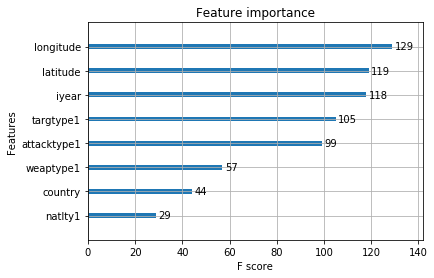

In [13]:
# Exract the importance features
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(model)
pyplot.show()